In [11]:
#importing all the Libraries needed for the assignment work


from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.svm import SVC, LinearSVC
import seaborn as sns
sns.set(style="white", color_codes=True)
import warnings
warnings.filterwarnings("ignore")

In [12]:
from google.colab import drive
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


# 1st Question set
# Principal Component Analysis

In [14]:
#Reading csv data file from current directory
df= pd.read_csv("/drive/MyDrive/cc.csv")
df.head() #displaying the top contents
df.shape

(8950, 18)

In [15]:
df['TENURE'].value_counts()
# thi will highlight the repeated values

12    7584
11     365
10     236
6      204
8      196
7      190
9      175
Name: TENURE, dtype: int64

In [16]:
x = df.iloc[:,[1,2,3,4]]
y = df.iloc[:,-1] #it specifies row and column from the data set and works like indexing and placing in x, y co-ordinates

from sklearn import preprocessing
le = preprocessing.LabelEncoder() #Encoding target labels with Value between 0 and n_classes-1
df['CUST_ID'] = le.fit_transform(df.CUST_ID.values) #calculations are done and then transformation at this step

pca2 = PCA(n_components=2)
principalComponents = pca2.fit_transform(x)

# passing new pca and features values to new dataframe
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, df[['TENURE']]], axis = 1)
finalDf.head()

,principal component 1,principal component 2,TENURE
0,-1500.250819,-1114.178407,12
1,-592.910661,1914.657567,12
2,217.734556,905.144354,12
3,927.782551,-198.923616,12
4,-1310.548986,-359.591021,12


In [17]:
from sklearn.cluster import KMeans
nclusters = 2 # - this is the k in kmeans
km = KMeans(n_clusters=nclusters)
km.fit(x)

# predicting the cluster for each data point
y_cluster_kmeans = km.predict(x)
from sklearn import metrics
score = metrics.silhouette_score(x, y_cluster_kmeans)
print(score)


0.7526240640619958


In [18]:
scaler = StandardScaler() # Standardize features by removing the mean and scaling to unit variance.
X_Scale = scaler.fit_transform(x) # Fits transformer to X and y with optional parameters fit_params and returns a transformed version of X.

pca2 = PCA(n_components=2)
principalComponents = pca2.fit_transform(X_Scale)
#passing new pca data and features values to new datorama
principalDf1 = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

finalDf1 = pd.concat([principalDf1, df[['TENURE']]], axis = 1)
finalDf1.head()

from sklearn.cluster import KMeans
nclusters = 2 # this is the k in kmeans
km = KMeans(n_clusters=nclusters)
km.fit(X_Scale)

# predict the cluster for each data point
y_cluster_kmeans = km.predict(X_Scale)
from sklearn import metrics
score = metrics.silhouette_score(X_Scale, y_cluster_kmeans)
print(score)

0.6718629680101729


# 2nd Question set

In [20]:
df= pd.read_csv(r"/drive/MyDrive/pd_speech_features.csv")
df.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [21]:
df.shape

(756, 755)

In [22]:
df['class'].value_counts()

1    564
0    192
Name: class, dtype: int64

In [23]:
X = df.drop('class',axis=1).values
y = df['class'].values

In [24]:
scaler = StandardScaler()
X_Scale = scaler.fit_transform(X) #calculations are done and then transformation at this step

In [25]:
pca2 = PCA(n_components=3)
principalComponents = pca2.fit_transform(X_Scale)

principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3'])

finalDf = pd.concat([principalDf, df[['class']]], axis = 1)
finalDf.head()

,principal component 1,principal component 2,principal component 3,class
0,-10.047372,1.471077,-6.846399,1
1,-10.637725,1.583750,-6.830976,1
2,-13.516185,-1.253542,-6.818695,1
3,-9.155083,8.833603,15.290916,1
4,-6.764470,4.611468,15.637128,1


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_Scale,y, test_size=0.3,random_state=0)

svc = SVC(max_iter=1000)

#SVC works by mapping data points to a high-dimensional space and then finding the optimal hyperplane that divides the data into two classes

svc.fit(X_train, y_train)

Y_pred = svc.predict(X_test)

acc_svc = round(svc.score(X_train, y_train) * 100, 2)

print("svm accuracy =", acc_svc)

svm accuracy = 91.68


# 3 Question
# Linear Discriminant Analysis

In [30]:
import math
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


df = pd.read_csv("/drive/MyDrive/Iris.csv")

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [31]:

from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler() #StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance
X_train_std = stdsc.fit_transform(df.iloc[:,range(0,4)].values)

In [32]:
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()  #Encode target labels with value between 0 and n_classes-1
y = class_le.fit_transform(df['Species'].values)

In [33]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis #LDA is mainly used in classification problems where you have a categorical output variable
lda = LinearDiscriminantAnalysis(n_components=2) #setting the dimensions k-2
X_train_lda = lda.fit_transform(X_train_std,y)


In [34]:
data=pd.DataFrame(X_train_lda)
data['class']=y
data.columns=["LD1","LD2","class"]
data.head()

,LD1,LD2,class
0,9.423452,-0.513976,0
1,8.751900,-1.591678,0
2,8.973004,-1.068204,0
3,8.170186,-1.435135,0
4,9.249789,-0.136869,0


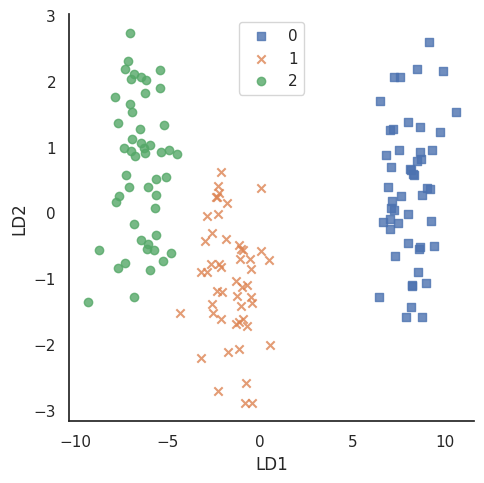

In [35]:
markers = ['s', 'x', 'o']
colors = ['r', 'b', 'g']
sns.lmplot(x="LD1", y="LD2", data=data, hue='class', markers=markers, fit_reg=False, legend=False)
plt.legend(loc='upper center')
plt.show()

# 4th Question
Briefly identify the difference between PCA and LDA?

Answer : Both LDA and PCA rely on linear transformations and aim to maximize the variance in a lower dimension. PCA is an unsupervised learning algorithm while LDA is a supervised learning algorithm. This means that PCA finds directions of maximum variance regardless of class labels while LDA finds directions of maximum class separability. 

While PCA reduces the features into a smaller subset of orthogonal variables, called principal components – linear combinations of the original variables. The first component captures the largest variability of the data, while the second captures the second largest, and so on. 

 And LDA finds the linear discriminants in order to maximize the variance between the different categories while minimizing the variance within the class